pygame 2.1.2 (SDL 2.0.18, Python 3.10.1)
Hello from the pygame community. https://www.pygame.org/contribute.html
783
541
1397
494
860
945
456
969
941
1335
1462
1063
993
172
1353
833
429
238
607
102
269
796
166
180
844
1400
149
1051
1444
1070
450
942
623
1233
1464
785
1032
622
42
1545
1149
1218
1215
318
304
499
488
997
808
1022
408
1116
86
1209
24
27
1144
810
870
1541
1004
53
1315
757
1078
306
823
358
32
100
1384
104
453
646
226
738
1249
501
586
1314
1085
130
1405
1061
884
688
438
1093
690
1222
1198
1037
616
211
701
963
468
230
1094
657
1234
977
66
1185
780
1402
816
200
971
446
133
1387
26
271
591
280
1453
145
461
331
1204
875
864
612
689
1455
1069
843
1052
483
1162
1528
409
377
1101
537
529
706
584
235
1088
948
1427
1276
432
1377
150
1066
1167
1332
506
1205
938
1365
1309
777
278
58
1023
500
865
412
1176
567
806
579
943
1357
569
1512
770
492
1033
115
329
1381
848
871
1415
886
812
1112
835
370
654
1369
712
1255
457
834
502
39
1016
1223
1035
463
322
182
1152
684
927
687
71
351
890
721
520

  0%|          | 0/180 [00:00<?, ?it/s]

1.0 0.0


  1%|          | 2/180 [00:00<00:46,  3.82it/s]


Exception: 

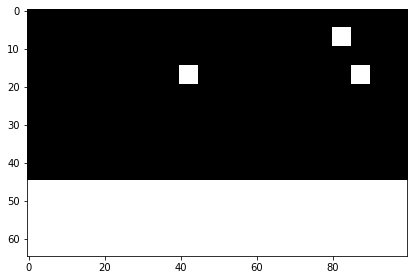

In [1]:
import os
from pathlib import Path
import pickle

import numpy as np
from tqdm import tqdm
from games.smb1Py.py_mario_bros.PythonSuperMario_master.source import tools
from games.smb1Py.py_mario_bros.PythonSuperMario_master.source.states.segment import Segment, SegmentState
from training_data import TrainingDataManager
import games.smb1Py.py_mario_bros.PythonSuperMario_master.source.constants as c
import json
from skimage.io import imshow

data_folder = Path("H://Other computers//My Computer//")
fitness_folder = data_folder/'smb1Py'/'run_10_fitness_history';
dat:dict[int,dict[int,float]] = None;  # type: ignore

out_folder = Path("data");

start_gen = 1533;

target = 1547;

for f in os.listdir(fitness_folder):
    f = Path(f);
    if (os.path.exists(out_folder/f.with_suffix('.gz')) and False):
        continue;
    num = int(str(f).split('_')[1]);
    print(num);
    if num < start_gen:
        continue;
    if num != target:
        continue;
    p = fitness_folder/f; 
    p = p.resolve();
    print(p);
    with open(p,'rb') as f:
        dat = pickle.load(f);

    TDM = TrainingDataManager[SegmentState]('smb1Py',10,data_folder=data_folder);

    game = tools.Control();
    state_dict = {c.LEVEL: Segment()}
    game.setup_states(state_dict, c.LEVEL)
    started = False;
    tile_scale = 5;
    view_distance = 6;

    training_data = []

    print(list(dat.keys())[:20])

    for id,fitnesses in tqdm(dat.items()):
        state = TDM[id];
        # state.static_data[c.MAP_MAPS][0][c.MAP_START][1] -= 12;
        if not started:
            game.state.startup(0,{c.LEVEL_NUM:1},initial_state=state);
            started = True;
        else:
            game.load_segment(state);
        # sstate:Segment = game.state;
        # print(sstate.player.rect.center);
        # sstate.player.rect.move(0,10);
        # print(sstate.player.rect.center);
        gdat = game.get_game_data(view_distance,tile_scale);
        mdat = game.get_map_data(tile_scale);
        if mdat['grid_bounds'][1] == mdat['grid_bounds'][3]:
            continue;
        c = mdat['collision_grid'];
        c = np.array(c).astype(np.float32);
        print(np.max(c),np.min(c));
        imshow(c)
        raise Exception()
            
        training_data.append(((gdat,mdat),max(fitnesses.values())));



    with open((out_folder/p.name).with_suffix('.gz'),'wb') as f:
        pickle.dump(training_data,f);

